In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from machines import mps_trotter
from machines import mps_utils
import utils
import scipy
import h5py
import exact_diagonalization as ed

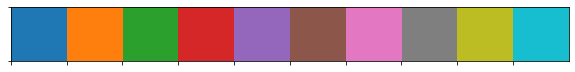

In [7]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

cp = sns.color_palette()
sns.palplot(cp)
plt.show()

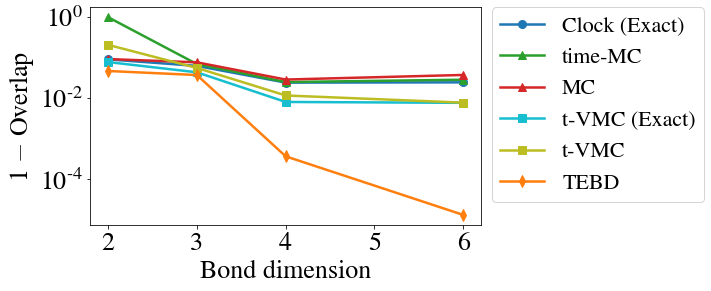

In [12]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
data_dir = "D:/ClockV2/histories"

time_steps = 20
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]

exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)

bond_list = [2, 3, 4, 6]
overlaps = {"Clock (Exact)": [], "time-MC": [], "MC": [], "TEBD": []}
for d_bond in bond_list:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    overlaps["TEBD"].append(utils.averaged_overlap(exact_state, trotter_state))
    
    #full = mps_trotter.TFIMFull(exact_state[0], d_bond, dt, h=h_ev)
    #full_state = full.dense_evolution(time_steps)
    #overlaps["Full"].append(utils.averaged_overlap(exact_state, full_state))
    
    clock_hist = h5py.File("{}/N={}/allstates_mpsD{}_N{}M{}.h5py".format(data_dir, n_sites, d_bond, n_sites, time_steps), "r")
    overlaps["Clock (Exact)"].append(clock_hist["avg_overlaps"][-1])
    clock_hist.close()
    
    clock_hist = h5py.File("{}/N={}/sampling20000_mpsD{}_N{}M{}.h5py".format(data_dir, n_sites, d_bond, n_sites, time_steps), "r")
    overlaps["time-MC"].append(clock_hist["overlaps"][-1])
    clock_hist.close()
    
    clock_hist = h5py.File("{}/N={}/spacesampling1000_mpsD{}_N{}M{}.h5py".format(data_dir, n_sites, d_bond, n_sites, time_steps), "r")
    overlaps["MC"].append(clock_hist["avg_overlaps"][-1])
    clock_hist.close()
    
tvmc_hist = h5py.File("{}/N={}/tvmc_allstates_mpsd2_6_N{}M{}.h5py".format(data_dir, n_sites, n_sites, time_steps), "r")
overlaps["t-VMC (Exact)"] = tvmc_hist["avg_overlaps"][()]
tvmc_hist.close()

tvmc_hist = h5py.File("{}/N={}/tvmc_sampling5000_mpsd2_6_N{}M{}.h5py".format(data_dir, n_sites, n_sites, time_steps), "r")
overlaps["t-VMC"] = tvmc_hist["avg_overlaps"][()]
tvmc_hist.close()

plt.figure(figsize=(7, 4))
#plt.title("MPS, $N={}$, $T={}$".format(n_sites, time_steps))
plot_list = [("Clock (Exact)", "o", cp[0]), ("time-MC", "^", cp[2]), ("MC", "^", cp[3]), 
             ("t-VMC (Exact)", "s", cp[-1]), ("t-VMC", "s", cp[-2]),
             ("TEBD", "d", cp[1])]
for k, m, c in plot_list:
    plt.semilogy(bond_list, 1 - np.array(overlaps[k]), color=c, marker=m, markersize=8, linewidth=2.5, label=k)
plt.xlabel("Bond dimension")
plt.ylabel("1 $-$ Overlap")
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.6), fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05), fontsize=22)
plt.show()
#plt.savefig("overlap_clock_tebd.pdf", bbox_inches='tight')

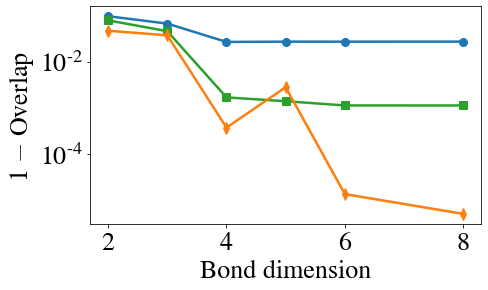

In [65]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
data_dir = "D:/ClockV2/histories"

time_steps = 20
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]

exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)

bond_list = [2, 3, 4, 5, 6, 8]
overlaps = {"Clock": [], "TEBD": []}
for d_bond in bond_list:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    overlaps["TEBD"].append(utils.averaged_overlap(exact_state, trotter_state))
    
    #full = mps_trotter.TFIMFull(exact_state[0], d_bond, dt, h=h_ev)
    #full_state = full.dense_evolution(time_steps)
    #overlaps["Full"].append(utils.averaged_overlap(exact_state, full_state))
    
    clock_hist = h5py.File("{}/N={}/allstates_mpsD{}_N{}M{}.h5py".format(data_dir, n_sites, d_bond, n_sites, time_steps), "r")
    overlaps["Clock"].append(clock_hist["overlaps"][-1])
    clock_hist.close()
    
    
tvmc_hist = h5py.File("{}/N={}/tvmc_allstates_mpsd2_8_N{}M{}.h5py".format(data_dir, n_sites, n_sites, time_steps), "r")
overlaps["t-VMC"] = list(tvmc_hist["avg_overlaps"][()])
overlaps["t-VMC"].pop(-2)
tvmc_hist.close()


plt.figure(figsize=(7, 4))
#plt.title("MPS, $N={}$, $T={}$".format(n_sites, time_steps))
plot_list = [("Clock", "o", cp[0]),
             ("t-VMC", "s", cp[2]), 
             ("TEBD", "d", cp[1])]
for k, m, c in plot_list:
    plt.semilogy(bond_list, 1 - np.array(overlaps[k]), color=c, marker=m, markersize=8, linewidth=2.5, label=k)
plt.xlabel("Bond dimension")
plt.ylabel("1 $-$ Overlap")
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.6), fontsize=22)
#plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05), fontsize=22)
#plt.show()
plt.savefig("overlap_clock_tebd_tvmc.pdf", bbox_inches='tight')

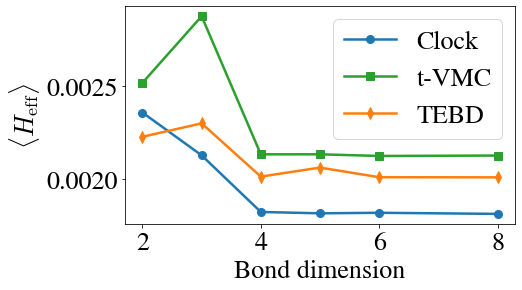

In [66]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
data_dir = "D:/ClockV2/final_dense"

time_steps = 20
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]

ham = utils.tfim_hamiltonian(n_sites, h=h_ev)
exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)
clock = ed.construct_sparse_clock(ham, dt, time_steps)
clock = np.array(clock.todense())
clock_energy = lambda x: (x.ravel().conj() * clock.dot(x.ravel())).sum().real / (np.abs(x)**2).sum()

bond_list = [2, 3, 4, 5, 6, 8]
energies = {"Clock": [], "TEBD": [], "t-VMC": []}
for d_bond in bond_list:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    energies["TEBD"].append(clock_energy(trotter_state))
    
    clock_state = np.load("{}/allstates_mpsD{}_N{}M{}.npy".format(data_dir, d_bond, n_sites, time_steps))
    energies["Clock"].append(clock_energy(clock_state))
    
    tvmc_state = np.load("{}/tvmc/tvmc_allstates_stepmpsD{}_N{}M{}.npy".format(data_dir, d_bond, n_sites, time_steps))
    energies["t-VMC"].append(clock_energy(tvmc_state))

                             
plt.figure(figsize=(7, 4))
#plt.title("MPS, $N={}$, $T={}$".format(n_sites, time_steps))
plot_list = [("Clock", "o", cp[0]),
             ("t-VMC", "s", cp[2]), 
             ("TEBD", "d", cp[1])]
for k, m, c in plot_list:
    plt.plot(bond_list, np.array(energies[k]), color=c, marker=m, markersize=8, linewidth=2.5, label=k)
plt.xlabel("Bond dimension")
plt.ylabel(r"$\langle H_\mathrm{eff}\rangle $")
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.6), fontsize=22)
#plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05), fontsize=22)
plt.legend(loc="upper right")
#plt.show()
plt.savefig("clock_energy_tebd_tvmc.pdf", bbox_inches='tight')

My TEBD is problematic for odd bond dimensions?

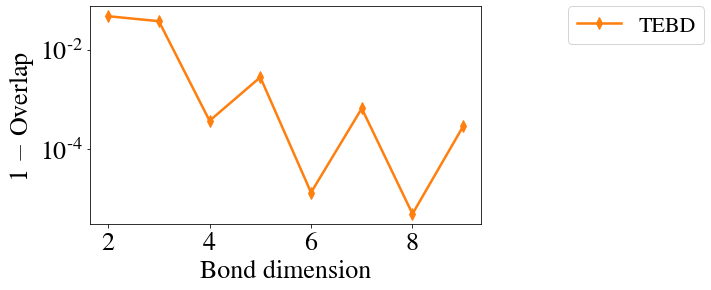

In [20]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
data_dir = "D:/ClockV2/histories"

time_steps = 20
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]

exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)

bond_list = np.arange(2, 10)
overlaps = {"TEBD": []}
for d_bond in bond_list:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    overlaps["TEBD"].append(utils.averaged_overlap(exact_state, trotter_state))


plt.figure(figsize=(7, 4))
#plt.title("MPS, $N={}$, $T={}$".format(n_sites, time_steps))
plot_list = [("TEBD", "d", cp[1])]
for k, m, c in plot_list:
    plt.semilogy(bond_list, 1 - np.array(overlaps[k]), color=c, marker=m, markersize=8, linewidth=2.5, label=k)
plt.xlabel("Bond dimension")
plt.ylabel("1 $-$ Overlap")
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.6), fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.05), fontsize=22)
plt.show()
#plt.savefig("overlap_clock_tebd.pdf", bbox_inches='tight')

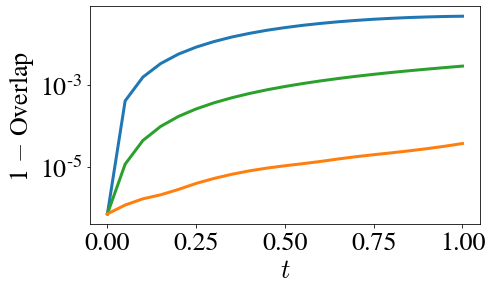

In [67]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
time_steps = 20
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]
data_dir = "D:/ClockV2/final_dense"

exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)
time_overlap = lambda x: np.abs((exact_state.conj() * x).sum(axis=1))**2 / (np.abs(x)**2).sum(axis=1)
overlaps = {}

for d_bond in [2, 3, 4, 6, 8]:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    overlaps["TEBD $D={}$".format(d_bond)] = time_overlap(trotter_state)

    clock_state = np.load("{}/allstates_mpsD{}_N{}M{}.npy".format(data_dir, d_bond, n_sites, time_steps))
    overlaps["Clock $D={}$".format(d_bond)] = time_overlap(clock_state)
    
    tvmc_state = np.load("{}/tvmc/tvmc_allstates_stepmpsD{}_N{}M{}.npy".format(data_dir, d_bond, n_sites, time_steps))
    overlaps["t-VMC $D={}$".format(d_bond)] = time_overlap(tvmc_state)

plt.figure(figsize=(7, 4))
#plt.title("MPS $N={}$, $T={}$".format(d_bond, n_sites, time_steps))
#plot_list = [("Clock $D=3$", cp[0], 0.6, "--"), ("Clock $D=6$", cp[0], 1.0, "-"),
#             ("t-VMC $D=3$", cp[2], 0.6, "--"), ("t-VMC $D=6$", cp[2], 1.0, "-"),
#             ("TEBD $D=3$", cp[1], 0.6, "--"), ("TEBD $D=6$", cp[1], 1.0, "-")]

d_plot = 6
plot_list = [("Clock $D={}$".format(d_plot), cp[0], 1.0, "-"), 
             ("t-VMC $D={}$".format(d_plot), cp[2], 1.0, "-"), 
             ("TEBD $D={}$".format(d_plot), cp[1], 1.0, "-")]
for k, c, a, l in plot_list:
    plt.semilogy(t, 1 - np.array(overlaps[k]), alpha=a, color=c, linewidth=3.0, label=k[:-6], linestyle=l)
plt.xlabel("$t$")
plt.ylabel(r"1 $-$ Overlap")
#plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.55), fontsize=22)
#plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1.05), fontsize=22)
#plt.show()
plt.savefig("sigma_x_clock_tebd_tvmc.pdf", bbox_inches='tight')

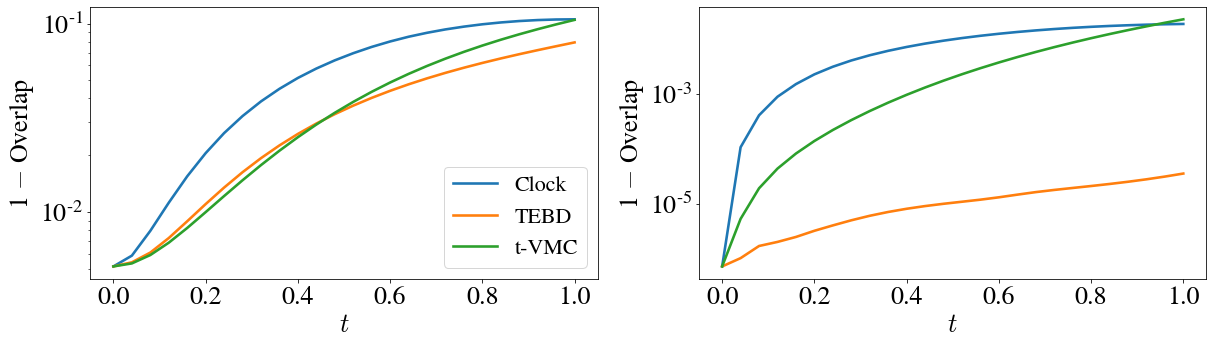

In [34]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
time_steps = 25
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]
data_dir = "D:/ClockV2/final_dense"

exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)
time_overlap = lambda x: np.abs((exact_state.conj() * x).sum(axis=1))**2 / (np.abs(x)**2).sum(axis=1)
overlaps = {}

for d_bond in [3, 6]:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    overlaps["TEBD $D={}$".format(d_bond)] = time_overlap(trotter_state)

    clock_state = np.load("{}/allstates_mpsD{}_N{}M{}.npy".format(data_dir, d_bond, n_sites, time_steps))
    overlaps["Clock $D={}$".format(d_bond)] = time_overlap(clock_state)
    
    tvmc_state = np.load("{}/tvmc/tvmc_allstates_stepmpsD{}_N{}M{}.npy".format(data_dir, d_bond, n_sites, time_steps))
    overlaps["t-VMC $D={}$".format(d_bond)] = time_overlap(tvmc_state)

plt.figure(figsize=(20, 5))
plt.subplot(121)
for i, k in enumerate(["Clock", "TEBD", "t-VMC"]):
    plt.semilogy(t, 1 - np.array(overlaps["{} $D=3$".format(k)]), color=cp[i], linewidth=2.6, label=k)
plt.xlabel("$t$")
plt.ylabel(r"1 $-$ Overlap")
plt.legend(loc="lower right", fontsize=22)

plt.subplot(122)
for i, k in enumerate(["Clock", "TEBD", "t-VMC"]):
    plt.semilogy(t, 1 - np.array(overlaps["{} $D=6$".format(k)]), color=cp[i], linewidth=2.6, label=k)
plt.xlabel("$t$")
plt.ylabel(r"1 $-$ Overlap")

plt.show()

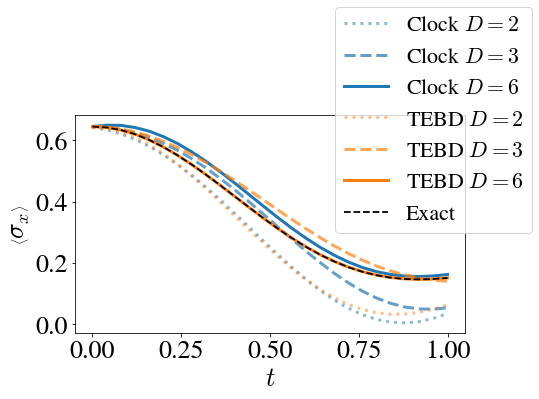

In [5]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
time_steps = 25
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]
data_dir = "D:/ClockV2/final_dense"

exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)
pauli = utils.Pauli(dtype=exact_state.dtype)
obs_X = {}

for d_bond in [2, 3, 6]:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    obs_X["TEBD $D={}$".format(d_bond)] = utils.ev_local(trotter_state, pauli.X)

    clock_state = np.load("{}/allstates_mpsD{}_N{}M{}.npy".format(data_dir, d_bond, n_sites, time_steps))
    obs_X["Clock $D={}$".format(d_bond)] = utils.ev_local(clock_state, pauli.X)

plt.figure(figsize=(7, 4))
#plt.title("MPS $N={}$, $T={}$".format(d_bond, n_sites, time_steps))
plot_list = [("Clock $D=2$", cp[0], 0.5, ":"), ("Clock $D=3$", cp[0], 0.7, "--"), ("Clock $D=6$", cp[0], 1.0, "-"),
             ("TEBD $D=2$", cp[1], 0.5, ":"), ("TEBD $D=3$", cp[1], 0.7, "--"), ("TEBD $D=6$", cp[1], 1.0, "-")]
for k, c, a, l in plot_list:
    plt.plot(t, obs_X[k].real, alpha=a, color=c, linewidth=3.0, label=k, linestyle=l)
plt.plot(t, exact_obs["X"].real, "--", color="black", linewidth=1.8, label="Exact")
plt.xlabel("$t$")
plt.ylabel(r"$\left \langle \sigma _x\right \rangle$")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.55), fontsize=22)
#plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1.05), fontsize=22)
plt.show()
#plt.savefig("sigma_x_clock_tebd.pdf", bbox_inches='tight')

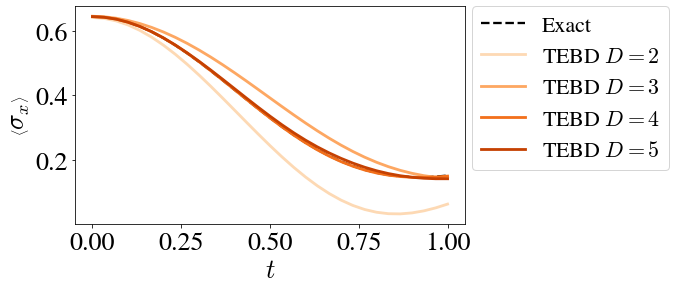

In [5]:
n_sites = 6
h_init = 1.0
h_ev = 0.5
time_steps = 30
t = np.linspace(0.0, 1.0, time_steps + 1)
dt = t[1] - t[0]
data_dir = "D:/ClockV2/final_dense"

exact_state, exact_obs = utils.tfim_exact_evolution(n_sites, t[-1], time_steps, h0=h_init, h=h_ev)
pauli = utils.Pauli(dtype=exact_state.dtype)
obs_X = {}

for d_bond in [2, 3, 4, 5]:
    trotter = mps_trotter.TFIM_TEBD(exact_state[0], d_bond, dt, h=h_ev)
    trotter_state = trotter.dense_evolution(time_steps)
    obs_X["TEBD $D={}$".format(d_bond)] = utils.ev_local(trotter_state, pauli.X)

plt.figure(figsize=(7, 4))
#plt.title("MPS $N={}$, $T={}$".format(d_bond, n_sites, time_steps))
plt.plot(t, exact_obs["X"].real, "--", color="black", linewidth=2.3, label="Exact")

cseq = sns.color_palette("Oranges", len(obs_X))
for i, k in enumerate(obs_X.keys()):
    plt.plot(t, obs_X[k].real, color=cseq[i], linewidth=2.8, label=k)
plt.xlabel("$t$")
plt.ylabel(r"$\left \langle \sigma _x\right \rangle$")
plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1.05), fontsize=22)
plt.show()
#plt.savefig("sigma_x_clock_trotter.pdf", bbox_inches='tight')